# **Import Libraries and modules**

In [1]:
# https://keras.io/
# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.
# Performing pip installation of Keras and then importing it

!pip install -q keras
import keras

Using TensorFlow backend.


## Importing Desired Modules and Classes for this Mode

In [0]:
# Used for scientific computing in Python
import numpy as np

# Used to create models layer-by-layer
from keras.models import Sequential

# Different layer modules from keras
from keras.layers import Dense, Dropout, Activation, Flatten, Add

# Used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs and also for Maxpooling
from keras.layers import Convolution2D, MaxPooling2D

# Used for Array and list manipulation
from keras.utils import np_utils

# The MNIST dataset is one of the most common datasets used for image classification 
# taken from American Census Bureau employees and American high school students
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Loading dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


## Importing and demoing the purpose of Matpotlib

(60000, 28, 28)


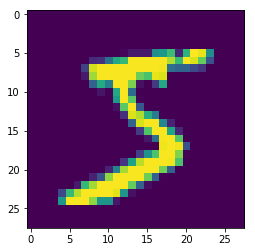

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Reshaping the 'X' Training and Test Data to be compatible with Convolution2D

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Scaling or Normalizing the inputs

In [0]:
# It is most common to use 32-bit precision when training a neural network
# Since the dataset fits easily in RAM, we might as well convert to float immediately.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 255 is the maximum value of a byte and this division will ensure that the input features are scaled between 0.0 and 1.0
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# to_categorical converts this into a matrix with as many columns as there are classes

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## The Model

In [11]:
from keras.layers import Activation

# import BatchNormalization
from keras.layers.normalization import BatchNormalization

# instantiating a model of type Sequential
model = Sequential()

# adding a convolution layer with input image 28,28,1 with 32 kernels of 3 *3 
# also performing an activation of type 'rectified linear Unit'

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
print(model.output_shape)

# CONVOLUTION BLOCK 1 BEGINS
model.add(Convolution2D(16, 3, 3))
print(model.output_shape)

# Adding a Batch Normalization
model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Convolution2D(20, 3, 3, activation='relu'))
print(model.output_shape)
model.add(Convolution2D(32, 3, 3, activation='relu'))
print(model.output_shape)
# CONVOLUTION BLOCK 1 ENDS

# TRANSITION BLOCK 1 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 1, 1))
print(model.output_shape)
# TRANSITION BLOCK 1 ENDS


# CONVOLUTION BLOCK 2 BEGINS
model.add(Convolution2D(16, 3, 3, activation='relu'))
print(model.output_shape)
model.add(Convolution2D(24, 3, 3, activation='relu'))
print(model.output_shape)
# CONVOLUTION BLOCK 2 ENDS


# TRANSITION BLOCK 2 BEGINS
model.add(MaxPooling2D(pool_size=(2, 2)))


# drop out layer added
model.add(Dropout(0.4))

model.add(Convolution2D(16,1,1))
print(model.output_shape)
# TRANSITION BLOCK 2 ENDS


model.add(Convolution2D(10, 3, 3))

# Adding a Batch Normalization
model.add(BatchNormalization())

model.add(Activation('relu'))
print(model.output_shape)

# We need to convert the multidimensional tensor into a single 1-D tensor, so we use Flatten
model.add(Flatten()) #input channel = (1,1,10)

# softmax calculates the probabilities of each target class over all possible target classes
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()


(None, 26, 26, 16)
(None, 24, 24, 16)
(None, 22, 22, 20)
(None, 20, 20, 32)
(None, 10, 10, 16)
(None, 8, 8, 16)
(None, 6, 6, 24)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(None, 3, 3, 16)
(None, 1, 1, 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [12]:
# prints a summary representation of our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 20)        2900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 32)        5792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
__________

## Compiling a Model to Train

In [0]:
# Configures the model for training with 3 params which are loss, optimizer and metrics
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training the model for a given number of epochs

In [14]:
# The model is trained for 20 epochs with batch size of 32
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 18s 302us/step - loss: 0.5391 - acc: 0.8979
Epoch 2/30
60000/60000 [==============================] - 15s 251us/step - loss: 0.2210 - acc: 0.9524
Epoch 3/30
60000/60000 [==============================] - 15s 252us/step - loss: 0.1617 - acc: 0.9623
Epoch 4/30
60000/60000 [==============================] - 15s 252us/step - loss: 0.1334 - acc: 0.9671
Epoch 5/30
60000/60000 [==============================] - 16s 268us/step - loss: 0.1137 - acc: 0.9718
Epoch 6/30
60000/60000 [==============================] - 15s 255us/step - loss: 0.1025 - acc: 0.9741
Epoch 7/30
60000/60000 [==============================] - 15s 250us/step - loss: 0.0908 - acc: 0.9771
Epoch 8/30
60000/60000 [==============================] - 15s 252us/step - loss: 0.0830 - acc: 0.9790
Epoch 9/30
60000/60000 [==============================] - 15s 250us/step - loss: 0.0780 - acc: 0.9792
Epoch 10/30
60000/60000 [==============================] - 15s 258us/step - loss: 

## Evaluating the Model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.017940193890733643, 0.9942]


## Predicting the Output Data

In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[4.15987670e-05 8.75586193e-05 9.61629939e-06 3.24740868e-05
  2.05142242e-05 6.90198340e-06 1.78250116e-06 9.99772608e-01
  1.78250116e-06 2.51955553e-05]
 [1.42778126e-05 1.17531075e-04 9.99617934e-01 1.42778126e-05
  1.68912011e-05 1.42778126e-05 1.61851858e-04 1.42778126e-05
  1.42778126e-05 1.42778126e-05]
 [2.00969898e-05 9.99906540e-01 2.90089270e-06 1.21939174e-05
  1.09895182e-05 4.27511077e-06 6.19113871e-06 2.73694404e-05
  2.94283132e-06 6.34425805e-06]
 [9.98058736e-01 7.64136930e-05 3.47857008e-06 2.09728623e-05
  5.35642812e-06 2.46629588e-05 1.71715091e-03 1.13619335e-05
  3.72791146e-05 4.45331316e-05]
 [1.88689546e-06 1.88689546e-06 1.88689546e-06 1.88689546e-06
  9.99978662e-01 1.88689546e-06 6.24018730e-06 1.88689546e-06
  1.88689546e-06 1.88689546e-06]
 [1.78857917e-05 9.99940157e-01 1.34389666e-06 5.32521881e-06
  1.05529389e-05 2.10361054e-06 3.94684366e-06 1.48498602e-05
  1.13176714e-06 2.73812861e-06]
 [1.16733727e-05 3.87189757e-05 1.16733727e-05 1.16733727e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()